### 297. Serialize and Deserialize Binary Tree

#### Content
<p>Serialization is the process of converting a data structure or object into a sequence of bits so that it can be stored in a file or memory buffer, or transmitted across a network connection link to be reconstructed later in the same or another computer environment.</p>

<p>Design an algorithm to serialize and deserialize a binary tree. There is no restriction on how your serialization/deserialization algorithm should work. You just need to ensure that a binary tree can be serialized to a string and this string can be deserialized to the original tree structure.</p>

<p><strong>Clarification:</strong> The input/output format is the same as <a href="/faq/#binary-tree" target="_blank">how LeetCode serializes a binary tree</a>. You do not necessarily need to follow this format, so please be creative and come up with different approaches yourself.</p>

<p>&nbsp;</p>
<p><strong>Example 1:</strong></p>
<img alt="" src="https://assets.leetcode.com/uploads/2020/09/15/serdeser.jpg" style="width: 442px; height: 324px;" />
<pre>
<strong>Input:</strong> root = [1,2,3,null,null,4,5]
<strong>Output:</strong> [1,2,3,null,null,4,5]
</pre>

<p><strong>Example 2:</strong></p>

<pre>
<strong>Input:</strong> root = []
<strong>Output:</strong> []
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li>The number of nodes in the tree is in the range <code>[0, 10<sup>4</sup>]</code>.</li>
	<li><code>-1000 &lt;= Node.val &lt;= 1000</code></li>
</ul>


#### Difficulty: Hard, AC rate: 53.1%

#### Question Tags:
- String
- Tree
- Depth-First Search
- Breadth-First Search
- Design
- Binary Tree

#### Links:
 🎁 [Question Detail](https://leetcode.com/problems/serialize-and-deserialize-binary-tree/description/) | 🎉 [Question Solution](https://leetcode.com/problems/serialize-and-deserialize-binary-tree/solution/) | 💬 [Question Discussion](https://leetcode.com/problems/serialize-and-deserialize-binary-tree/discuss/?orderBy=most_votes)

#### Hints:


#### Sample Test Case
[1,2,3,null,null,4,5]

---
What's your idea?

BFS

---

In [11]:
# Definition for a binary tree node.
class TreeNode(object):
    def __init__(self, x, left = None, right = None):
        self.val = x
        self.left = left
        self.right = right

In [12]:
class Codec:

    def serialize(self, root):
        """Encodes a tree to a single string.
        
        :type root: TreeNode
        :rtype: str
        """
        if root is None:
            return ''
        r = ''
        cur = [root]
        while cur:
            nxt = []
            for n in cur:
                if n:
                    nxt += [n.left, n.right]
            if not nxt:
                break
            r += (','.join([str(n.val) if n else 'N' for n in cur]) + '#')
            cur = nxt
        return r

    def deserialize(self, data):
        """Decodes your encoded data to tree.
        
        :type data: str
        :rtype: TreeNode
        """
        if not data:
            return None
        levels = data.split('#')
        root = TreeNode(int(levels[0]))
        prev = [root]
        for level in levels[1:-1]:
            vals = level.split(',')
            cur = []
            for idx, n in enumerate(prev):
                n.left = TreeNode(int(vals[2*idx])) if vals[2*idx] != 'N' else None
                if n.left:
                    cur.append(n.left)
                n.right = TreeNode(int(vals[2*idx+1])) if vals[2*idx+1] != 'N' else None
                if n.right:
                    cur.append(n.right)
            prev = cur
        return root

In [13]:
def is_same_tree(p, q):
  if not p and not q:
    return True
  if not p or not q or p.val != q.val:
    return False
  return is_same_tree(p.left, q.left) and is_same_tree(p.right, q.right) 

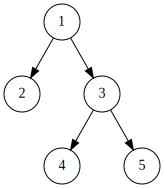

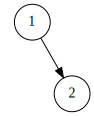

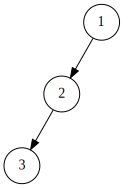

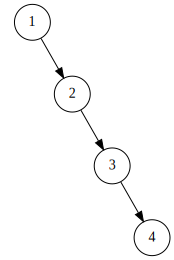

In [14]:
from helper import array_to_tree
from visualizer import visualize_binary_tree
# Your Codec object will be instantiated and called as such:
root = array_to_tree([1,2,3,None,None,4,5])
ser = Codec()
deser = Codec()
ans = deser.deserialize(ser.serialize(root))
visualize_binary_tree(ans)
assert is_same_tree(root, ans) == True

root = None
ser = Codec()
deser = Codec()
ans = deser.deserialize(ser.serialize(root))
assert is_same_tree(root, ans) == True

root = array_to_tree([1,None,2])
ser = Codec()
deser = Codec()
ans = deser.deserialize(ser.serialize(root))
visualize_binary_tree(ans)
assert is_same_tree(root, ans) == True

root = array_to_tree([1,2,None,3])
ser = Codec()
deser = Codec()
ans = deser.deserialize(ser.serialize(root))
visualize_binary_tree(ans)
assert is_same_tree(root, ans) == True

root = TreeNode(1)
root.right = TreeNode(2)
root.right.right = TreeNode(3)
root.right.right.right = TreeNode(4)
ser = Codec()
deser = Codec()
ans = deser.deserialize(ser.serialize(root))
visualize_binary_tree(ans)
assert is_same_tree(root, ans) == True

In [15]:
import sys, os; sys.path.append(os.path.abspath('..'))
from submitter import submit
submit(297)

😃 Result: Accepted

📥 Input: ``

📤 Output: ``

✅ Expected: ``

💯 Passed Test Case: 52 / 52

🚀 Runtime: 270 ms, Memory: 20.1 MB

🉑 Runtime Percentile: better than 49.90%, Memory Percentile: better than 45.90%

📆 Finished At: 2022-02-19